<a href="https://colab.research.google.com/github/thudimillasaiprasad/Building-CNN-Model-on-Binary-Clasifer-for-Dog-Vs-Cat/blob/main/Re_Building_a_CNN_Binary_classification_models_357.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation

Step 1: Open up you Jupyter notebook and create a blank Python3 notebook.

Step 2:Import the following Modules.

In [ ]:
import numpy as np 
import pandas as pd 
import os
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import random
from zipfile import ZipFile
import shutil
from keras.layers import Dropout


Lets connect the colab with the g-drive for importing dataset train test.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#lets zip off files and makes path for train and test the fiels

In [ ]:
from zipfile import ZipFile
file_name = "/content/gdrive/MyDrive/dogs-vs-cats.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from zipfile import ZipFile
train_data = "//content/train.zip"

with ZipFile(train_data, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from zipfile import ZipFile
file_name = "/content/test1.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
train_path = "./train"
test_path = "./test1"

# Preparing dataset for training model:
# lets define the function for categories list and make a dataframe and review 

In [ ]:
filenames = os.listdir(train_path)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(category)
    else:
        categories.append(category)

df = pd.DataFrame({
    'Image': filenames,
    'Category': categories
      })
df.head(-5)

,Image,Category
0,dog.3110.jpg,dog
1,dog.8133.jpg,dog
2,dog.718.jpg,dog
3,cat.3280.jpg,cat
4,dog.1131.jpg,dog
...,...,...
24990,dog.2569.jpg,dog
24991,dog.3052.jpg,dog
24992,dog.9953.jpg,dog
24993,cat.10860.jpg,cat


#Lets plot the Category columns to vizualised in bar plots

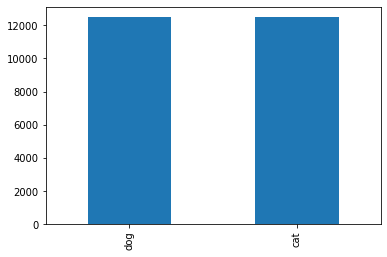

In [ ]:
df['Category'].value_counts().plot.bar()

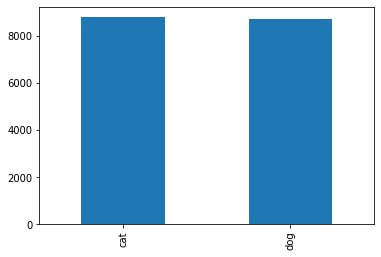

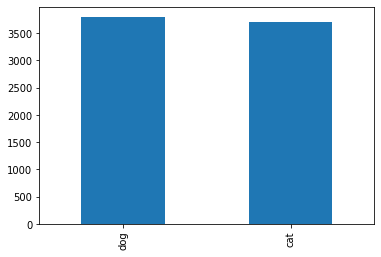

In [ ]:
# From sklearn use train test split to split the train data in to df-train and df_validation in the 80 to 20 .
# where out train set to 80 and test set to 20% to test .
# Lets plot the df traib and df validation .

df_train, df_validation = train_test_split(df, test_size=0.3, random_state=18)
df_train = df_train.reset_index(drop=True)
df_validation = df_validation.reset_index(drop=True)
df_train['Category'].value_counts().plot.bar()
plt.show()
df_validation['Category'].value_counts().plot.bar()

In [ ]:
df_train.shape

(17500, 2)

In [ ]:
df_validation.shape

(7500, 2)

#lets check out the train data, images which are will be random plots for dogs and cats

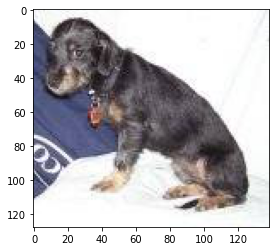

In [ ]:
sample = random.choice(df['Image'])
plt.imshow(plt.imread(("./train/"+sample)))

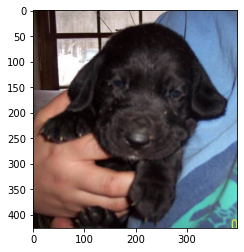

In [ ]:
sample = random.choice(df['Image'])
plt.imshow(plt.imread(("./train/"+sample)))

In [ ]:

df_train.shape


(17500, 2)

In [ ]:
filenames = os.listdir(test_path)
df_test = pd.DataFrame({'Image':filenames})

df_test.head(-5)

,Image
0,1745.jpg
1,628.jpg
2,7694.jpg
3,11662.jpg
4,8618.jpg
...,...
12490,4952.jpg
12491,1865.jpg
12492,6917.jpg
12493,146.jpg


In [ ]:
df_test.shape

(12500, 1)

# lets setup variables to define size of image and its channel RGB,batch_size,and no epochs .

# lets create objects make data_augmentation on the train data set and make validation for accurate training.
#We need to rescale the training data for the defaul size to keep. 

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=.2, height_shift_range=.2,
                             rotation_range=30,
                             brightness_range=[0.8, 1.2],
                             horizontal_flip=True)

datagenValidation = ImageDataGenerator(rescale=1./255)


In [ ]:
X_train = datagen.flow_from_dataframe(
    df_train, 
    directory = train_path, 
    x_col = 'Image',
    y_col = 'Category',
    target_size= (150,150),
    class_mode = 'binary',
    shuffle = True,
    batch_size = 32)

X_validation = datagenValidation.flow_from_dataframe(
    df_validation, 
    directory = train_path, 
    x_col = 'Image',
    y_col = 'Category',
    target_size= (150,150),
    class_mode = 'binary',
    shuffle = True,
    batch_size = 32)

Found 17500 validated image filenames belonging to 2 classes.
Found 7500 validated image filenames belonging to 2 classes.


#Lets define the objects for the test data also when we test with builded model.

In [ ]:
X_test = datagenValidation.flow_from_dataframe(
    df_test, 
    directory=test_path, 
    x_col='Image',
    y_col=None,
    class_mode=None,
    target_size= (150,150),
    batch_size=32,
    shuffle=False
)

Found 12500 validated image filenames.


### Defining our CNN Model Layers

## Model 

In [ ]:
model = tf.keras.models.Sequential()

## Adding the first CNN layer

CNN layer hyper-parameters:
filters: 32
kernel_size:3
activation: relu
input_shape: (150, 150, 3)

maxpooling_Layer (2,2)
dropout layer 0.25

In [ ]:
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.25))

Adding 2nd CNN layer 

CNN layer hyper-parameters:
filters: 64
kernel_size:3
activation: relu


maxpooling_Layer (2,2) dropout layer 0.25

In [ ]:
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.25))

   Adding 3rd CNN layer
CNN layer hyper-parameters:
filters: 128
kernel_size:3
activation: relu


maxpooling_Layer (2,2) dropout layer 0.25

In [ ]:
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.25))

   Adding 4th CNN layer
CNN layer hyper-parameters:
filters: 128
kernel_size:3
activation: relu


maxpooling_Layer (2,2) dropout layer 0.25

In [ ]:
model.add(keras.layers.Conv2D(256,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.50))

# This layer flattens the resulting image array to 1D array 

In [ ]:
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 

In [ ]:
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1

In [ ]:
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
# here i had applied optimer as adam with binary crossentropy

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model

# Training our Model

In [ ]:
history = model.fit(X_train, validation_data=X_validation,steps_per_epoch =100, epochs=10)

Epoch 1/10
100/100 [==============================] - 48s 456ms/step - loss: 0.7430 - accuracy: 0.5159 - val_loss: 0.6926 - val_accuracy: 0.5715
Epoch 2/10
100/100 [==============================] - 46s 457ms/step - loss: 0.6917 - accuracy: 0.5275 - val_loss: 0.6845 - val_accuracy: 0.5415
Epoch 3/10
100/100 [==============================] - 47s 470ms/step - loss: 0.6896 - accuracy: 0.5450 - val_loss: 0.6845 - val_accuracy: 0.5741
Epoch 4/10
100/100 [==============================] - 46s 463ms/step - loss: 0.6794 - accuracy: 0.5673 - val_loss: 0.6888 - val_accuracy: 0.5344
Epoch 5/10
100/100 [==============================] - 46s 459ms/step - loss: 0.6791 - accuracy: 0.5653 - val_loss: 0.6616 - val_accuracy: 0.6176
Epoch 6/10
100/100 [==============================] - 45s 451ms/step - loss: 0.6685 - accuracy: 0.5773 - val_loss: 0.6933 - val_accuracy: 0.5263
Epoch 7/10
100/100 [==============================] - 46s 460ms/step - loss: 0.6706 - accuracy: 0.5825 - val_loss: 0.6467 - val_ac

In [ ]:
#history = model.fit(X_train, validation_data=X_validation,steps_per_epoch =770, epochs=20)

In [ ]:
#history = model.fit(X_train, validation_data=X_validation,steps_per_epoch =250, epochs=20)

In [ ]:
#history = model.fit(X_train, validation_data=X_validation,steps_per_epoch =200, epochs=10)

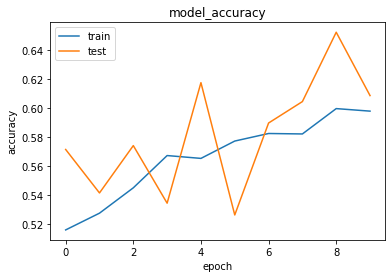

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
#As you can see our model has a training accuracy of 89% which is nearly 90% and validation accuracy of 93% which is not bad.(no batches and total 770 with epochs = 20)

#As you can see our model has a training accuracy of 80% which is nearly 84% and validation accuracy of 93% which is not bad.(step_per_epochs=250,where epochs = 20)

#As you can see our model had a training (200/200- 77s 387ms/step - loss: 0.5977 - accuracy: 0.6797 - val_loss: 0.5490 - val_accuracy: 0.7220)

# The above the model trained  for more than  three times and  got different values for the  different hyperparameters such as batch size and epoch and applying dropouts 25% in the evey layer .


model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_17 (ModuleWra (None, None, None, 32)    896       
_________________________________________________________________
module_wrapper_18 (ModuleWra (None, None, None, 32)    0         
_________________________________________________________________
module_wrapper_19 (ModuleWra (None, None, None, 32)    0         
_________________________________________________________________
module_wrapper_20 (ModuleWra (None, None, None, 64)    18496     
_________________________________________________________________
module_wrapper_21 (ModuleWra (None, None, None, 64)    0         
_________________________________________________________________
module_wrapper_22 (ModuleWra (None, None, None, 64)    0         
_________________________________________________________________
module_wrapper_23 (ModuleWra (None, None, None, 128)  

# Here below shows the numbers for cat and Dog

In [ ]:
X_train.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
label = np.where(y_pred=="Cat", 0, 1)
label

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


array(1)

In [ ]:
y_pred = np.where(y_pred > .5, "Dog", "Cat")
y_pred

array([['Dog'],
       ['Dog'],
       ['Dog'],
       ...,
       ['Dog'],
       ['Dog'],
       ['Dog']], dtype='<U3')

#Using our model to make Predictions with as image size of (15,15)

### Lets some figure to check in smaller dimensions

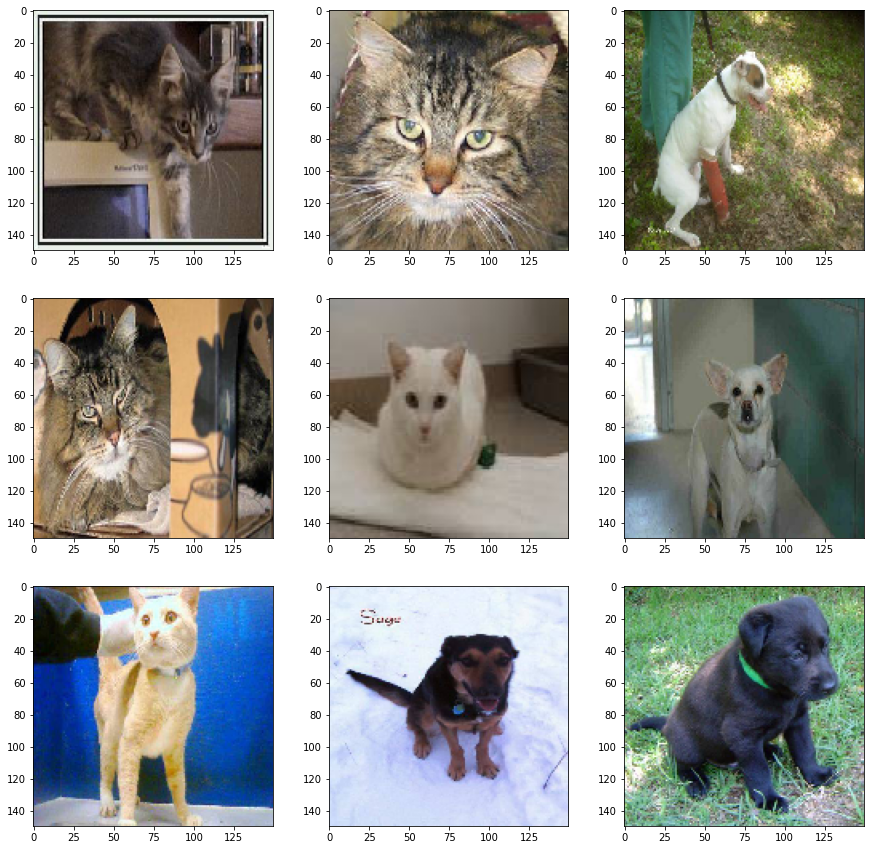

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[0][i])
    
plt.show()

# Conclutions:


#The two losses (both loss and val_loss) are decreasing and the tow acc (acc and val_acc) are increasing. So this indicates the modeling is trained in a good way.

#The val_acc is the measure of how good the predictions of your model are. So for my case, it looks like the model was trained pretty well.33

# Some questions raised:
# The acc (the acc on training set) is always smaller, actually much smaller, than val_acc. Is this normal? Why this happens?In my mind, acc should usually similar to better than val_acc.

# After  some epochs, the acc is still increasing. So should I use more epochs and stop when acc stops increasing? Or I should stop where val_acc stops increasing, regardless of the trends of acc?


# I had came to know the Training should be stopped when val_acc stops increasing, otherwise the  model will probably overffit. We can use earlystopping callback to stop training functions for over come the overrfitting problem where when the we past outside test images in to the model it may not give proper results and we need to perform hyperparameters tunning such changing learnig rate,no epochs,activation functions,optimizers,layers and batch of samples.So we can try reduce the overfitt problem of our model.
